In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

sns.set()
# mvnrnd is np.random.multivariate_normal

# Question 1
Consider a coin where the probability of heads is p. Determine the discrete pdf for the sum of tosses with heads as an outcome given that there are N tosses. Numerically show that this approaches a delta function at $N_p$ as $N \to \infty$

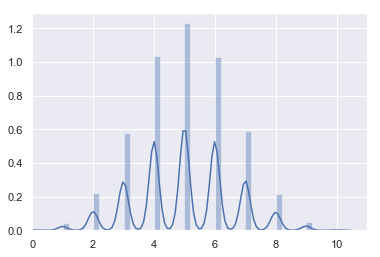

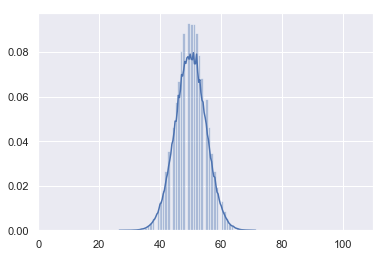

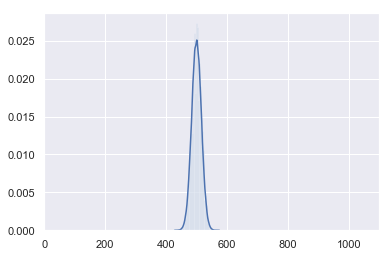

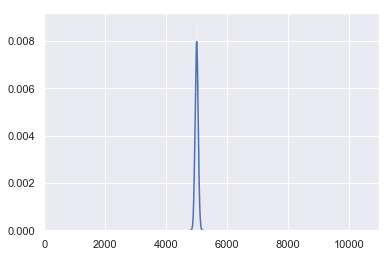

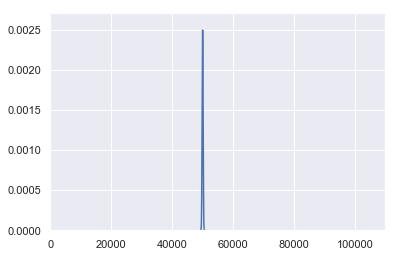

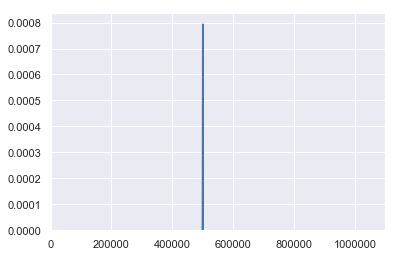

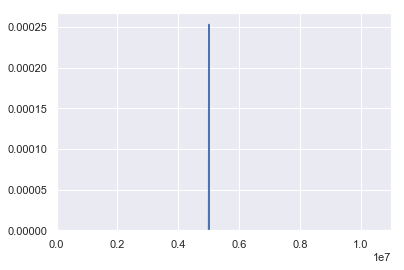

In [2]:
ns = 10 ** np.linspace(1,7,7)

for n in ns:
    n = int(n)
    p = 0.5
    size = 100000
    b = np.random.binomial(n, p, size)

    sns.distplot(b)
    plt.xlim([0, 1.1*n])
    plt.show()

# Question 2
## Part a

### Function $f_a(x)$

We know that $\int_{-\infty}^\infty f(x) = 1$, where $f(x)$ is the pdf.


\begin{equation}
\begin{split}
1 & = \int_{-\infty}^\infty A e^{(-0.25x)} u(x) \\
 & = A \int_{0}^\infty e^{(-0.25x)} \\
 & = A * 4 \\
A & = \frac{1}{4} \\
\end{split}
\end{equation}

### Function $f_b(x)$

$$
f_b(x) = \left\{
        \begin{array}{ll}
            B(20 - x)u(x) & \quad 0 \leq x < 0 \\
            0 & \quad otherwise
        \end{array}
    \right.
$$

So:

\begin{equation}
\begin{split}
   1 & = \int_{-\infty}^\infty f_b(x) \\
     & = \int_{0}^{20} B(20 - x) dx \\
     & = \int_{0}^{20} (20 B) dx -  \int_{0}^{20} (Bx) dx\\
     & = 20B \int_{0}^{20}dx -  B \int_{0}^{20} x dx\\
     & = 20B * \Big [x\Big ]_{0}^{20} - B \Big [\frac{x^2}{2} \Big]_{0}^{20} \\
     & = 20B * (20) - B * \frac{20^2}{2} \\
     & = 400B - 200B = 200B \\
   B & = \frac{1}{200}
\end{split}
\end{equation}

### Function $f_c(x)$

\begin{equation} \label{eq1}
\begin{split}
1 & = \int_{-\infty}^\infty f_c(x) \\
 & = C * 2 \\
C & = \frac{1}{2} \\
\end{split}
\end{equation}

In [3]:
# Helper functions
def u(x):
    # Set all elements to 1 when the matching x >= 0, else 0
    return (x >= 0)

def rect(x):
    # Set all elements to 1 when the matching -1/2 <= x <= 1/2, else 0 
    return (x >= -0.5) * (x <= 0.5)

def rect2(x, min, max):
    # Set all elements to 1 when the matching min <= x <= max, else 0 
    return (x >= min) * (x <= max)

In [4]:
x = np.linspace(-5,40,55000) # Plotting locations, range [-1,25]
dx = x[1] - x[0]

A = 1/4
B = 1/200
C = 1/2

f_a = A * np.exp(-0.25 * x) * u(x)
f_b = B * rect2(x, 0, 20) * (20 - x) * u(x)
f_c = C * rect((x - 4) / 2)

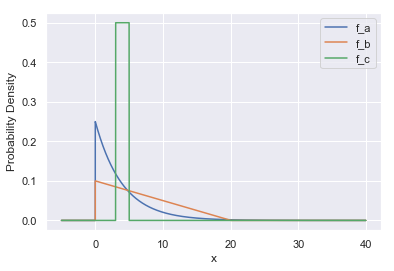

In [5]:
plt.plot(x, f_a, label='f_a')
plt.plot(x, f_b, label='f_b')
plt.plot(x, f_c, label='f_c')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

<hr>

## Part b:
Assuming 𝑎 ~ 𝑓𝑎(𝑎), 𝑏 ~ 𝑓𝑏(𝑏) and 𝑐 ~ 𝑓𝑐(𝑐) and that {a,b,c} are all independent, then plot the pdf of the random variable z = a + 2b + c denoted as fz(z) . Also plot the cumulative distribution function of 𝐹𝑧(𝑧) = ∫𝑓𝑧(𝑥)𝑑𝑥 .

In [6]:
# z = a + 2b + c

# 2b = ... (from https://math.stackexchange.com/questions/275648/multiplication-of-a-random-variable-with-constant)
f_y =  (1/2) * B * rect2(x, 0, 40) * (20 - x/2) * u(x)

# Convolve all functions together
i1 = np.convolve(f_a, f_y) * dx
f_z = np.convolve(i1, f_c) * dx

len(f_z)

164998

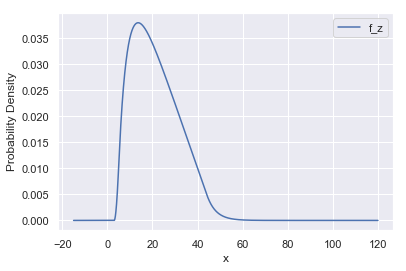

In [7]:
z = np.linspace(-15, 120, len(f_z))
plt.plot(z, f_z, label='f_z')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [8]:
F_z = np.zeros_like(f_z)  # The CDF
for i in range(F_z.shape[0]):
    F_z[i] = np.sum(f_z[:i]) * dx

F_z

array([0.        , 0.        , 0.        , ..., 1.00032282, 1.00032282,
       1.00032282])

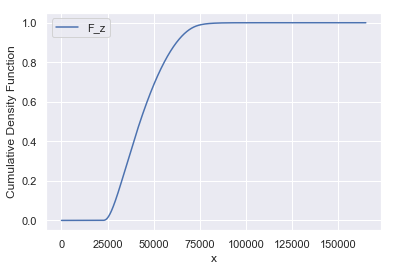

In [9]:
plt.plot(F_z, label='F_z')
plt.xlabel('x')
plt.ylabel('Cumulative Density Function')
plt.legend()
plt.show()

<hr>

## Part d
Analytically determine the mean value of the variable q = abc.

Since they are all indpendent the mean of the product is the product of the means.

(I had the full derivations but lost the work and don't have time to rewrite it completely)

#### For $E[a]$
We know that for exponential distributions the mean is $\frac{1}{\lambda}$, since here $\lambda = \frac{1}{4}$, $E[a] = 4$.

#### For $E[b]$
We can calculate by using: $\int_{-\infty}^\infty x f_b(x)$, $E[b] = 20/3$.
\begin{equation}
\begin{split}
    E[b] & = \int_{-\infty}^\infty f_b(x) \\
     & = \int_{0}^{20} x B(20 - x) dx \\
     & = \int_{0}^{20} x (20 B) dx -  \int_{0}^{20} (Bx^2) dx\\
     & = 20B \int_{0}^{20x}dx -  B \int_{0}^{20} x^2 dx\\
     & = 20B * \Big [\frac{x^2}{2}\Big ]_{0}^{20} - B \Big [\frac{x^3}{3} \Big]_{0}^{20} \\
     & = 20B * \frac{20^2}{2} - B * \frac{20^3}{3} \\
    & = \frac{20}{3}
\end{split}
\end{equation}

#### For $E[c]$
We know that for uniform distributions, the expected value will be in the middle of the high and the low values, so $E[c] = 4$

#### For $E[q]$
$E[q] = E[abc] = E[a] E[b] E[c] = 4 * \frac{20}{3} * 4 = 106.66...$

<hr>

## Part e
Numerically determine the mean value of the variable q = abc.

In [10]:
dx = 0.000001

A = 1/4; B = 1/200; C = 1/2

# Create range for integration
start = -5; end = 80
x = np.linspace(start, end, int((end - start) / dx) + 1)

f_a = A * np.exp(-0.25 * x) * u(x)
f_b = B * rect2(x, 0, 20) * (20 - x) * u(x)
f_c = C * rect((x - 4) / 2)

In [11]:
E_a = np.sum(x * f_a) * dx
E_b = np.sum(x * f_b) * dx
E_c = np.sum(x * f_c) * dx

print(E_a, E_b, E_c)

3.9999998268631085 6.666666666666648 4.000002000000001


In [12]:
E_q = E_a * E_b * E_c
print("E[q] = E[a] * E[b] * E[c] =", E_q)

E[q] = E[a] * E[b] * E[c] = 106.66671538301365


<hr>

## Part f
Determine the variance of the variable q = abc by numerical integration

Use: 

$$Var(q) = Var(abc) = E[a^2] E[b^2] E[c^2] - E[abc]^2 = E[a^2] E[b^2] E[c^2] - E[q]^2$$

In [13]:
var_a = np.sum(x**2 * f_a) * dx  # E[a^2]
var_b = np.sum(x**2 * f_b) * dx
var_c = np.sum(x**2 * f_c) * dx

var_a, var_b, var_c

(31.999985423523242, 66.6666666666666, 16.333341833333495)

In [14]:
var_a * var_b * var_c - E_q**2

23466.6585350054

<br>
<br>
<hr>

# Question 3

## Part a

$$X \sim N(\mu_X, \sigma_X^2)$$
$$Y \sim N(\mu_Y, \sigma_Y^2)$$
$$Z = X + Y$$

$$Z \sim N(\mu_X + \mu_Y, \sigma_X^2 + \sigma_Y^2)$$

Since, $\mu_a=1$ & $\mu_a=11$; and $\sigma_a^2=2$ & $\sigma_a^2=4$. 
We know $\mu_{3a}=1*3 = 3$ & $\mu_{5b}=11*5 = 55$; and $\sigma_{3a}^2= 18$ & $\sigma_{5b}^2= = 100$
$$Z \sim N(3+55, 18 + 100)$$
$$Z \sim N(58, 118)$$

So, $\mu_z = 58$, and $\sigma_z = 118$

<hr>

## Part B

For correlated random variables, we have the same mean but the variance changes. We can use the formula:
$$\sigma_{XY}^2 = \sigma_{X}^2 + \sigma_{Y}^2 + 2 \rho_{XY}$$

Where the covariance is: $\rho_{xy} = 1$

We can use the formula: $Cov(Ax + By) = AB Cov(xy)$

So we get the new variance as: 
$$\sigma_{XY}^2 = \sigma_{3a} + \sigma_{5b} + 2 * 3 * 5 Cov(ab)$$
$$\sigma_{XY}^2 = \sigma_{y} + \sigma_{y} + 2 * 3 * 5 Cov(xy)$$
𝑉𝑎𝑟[𝑧] = 18 + 100 + 2 * 3 * 5 * 1 = 148



So the new mean and variance are: $\mu_z = 58$, and $\sigma_z = 118$
$$Z \sim N(58, 148)$$

<hr>

## Part C

In [15]:
# Show that it is converged at large values
n=10000000
mu=[1, 11]
sigma=[[2, 1], [1, 4]]

R = np.random.multivariate_normal(mu, sigma, n)  # Same as mvnrnd in Matlab

Z = np.zeros((n, 1))
Z = R[:, 0] * 3 + R[:, 1] * 5
M = np.mean(Z)
variance = np.var(Z)

M, variance

(57.99358180544498, 147.98242137647023)

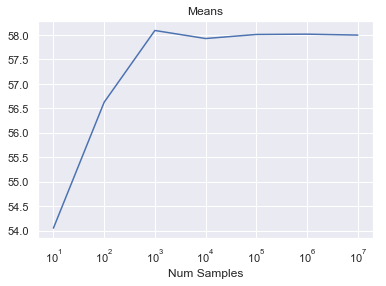

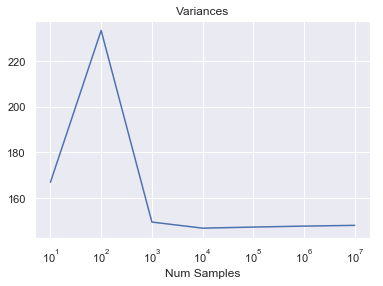

In [16]:
# Plot the convergence
ns = 10 ** np.linspace(1,7,7)  # range [1, 1e7]
mu = [1, 11]
sigma = [[2, 1], [1, 4]]

means, variances = [], []
for n in ns:
    n = int(n)
    R = np.random.multivariate_normal(mu, sigma, n)  # Same as mvnrnd in Matlab

    Z = np.zeros((n, 1))
    Z = R[:, 0] * 3 + R[:, 1] * 5

    mean = np.mean(Z)
    variance = np.var(Z)

    means.append(mean)
    variances.append(variance)

plt.plot(ns, means); plt.xscale('log'); plt.title("Means"); plt.xlabel("Num Samples"); plt.show()
plt.plot(ns, variances); plt.xscale('log'); plt.title("Variances"); plt.xlabel("Num Samples"); plt.show()

<hr>

## Question 4

In [17]:
Q=[[2, 1], [1, 4]]
evals, evecs = np.linalg.eig(sigma)
print("evals:", evals)
print("\nevecs:\n", evecs)

lam_1, lam_2 = evals
vec_1, vec_2 = evecs
vec_1, vec_2 = vec_1.reshape(-1, 1), vec_2.reshape(-1, 1)

evecs[:,1] = -evecs[:,1] # For some reason numpy and matlab don't match... use matlab version since it passes sanity check

evals: [1.58578644 4.41421356]

evecs:
 [[-0.92387953 -0.38268343]
 [ 0.38268343 -0.92387953]]


In [18]:
# Sanity check
Q = lam_1 * (vec_1 @ vec_1.T) + lam_2 * (vec_2 @ vec_2.T)
Q

array([[2., 1.],
       [1., 4.]])

In [19]:
# Show that it is converged at large values
n = int(1e7)
r = np.sqrt(lam_1) * np.random.randn(n) * vec_1 + np.sqrt(lam_2) * np.random.randn(n) * vec_2

# Covariance after 1e7 samples
np.cov(r)

array([[2.00118905, 1.00035802],
       [1.00035802, 3.9987527 ]])

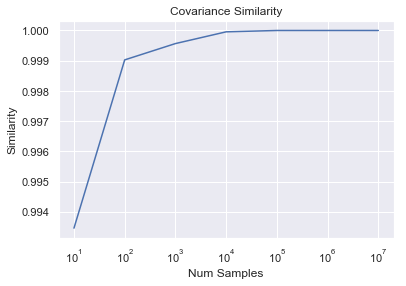

In [20]:
# Plot the convergence
ns = 10 ** np.linspace(1,7,7)  # range [1, 1e7]

# To get calcute the magnitude of the differences of the matrix
# Get the similarity of the covariance to [2,1; 1,4] of each
cov_sims = []
Q_flat = Q.reshape(-1)
for n in ns:
    n = int(n)
    r = np.sqrt(lam_1) * np.random.randn(n) * vec_1 + np.sqrt(lam_2) * np.random.randn(n) * vec_2
    cov = np.cov(r)  # Covariance
    cov_flat = cov.reshape(-1)
    cov_sims.append(np.sum(cov_flat * Q_flat) / (np.sqrt(np.sum(cov_flat**2)) * np.sqrt(sum(Q_flat**2))))

plt.plot(ns, cov_sims); plt.xscale('log'); plt.title("Covariance Similarity"); 
plt.xlabel("Num Samples"); plt.ylabel("Similarity"); plt.show()
plt.show()

<hr>

## Question 5

In [21]:
n = 100000
x = np.linspace(1, 3, n)
y = np.log(x) * np.cos((x**2) / 4)

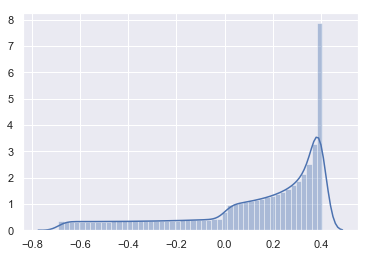

In [22]:
sns.distplot(y)
plt.show()

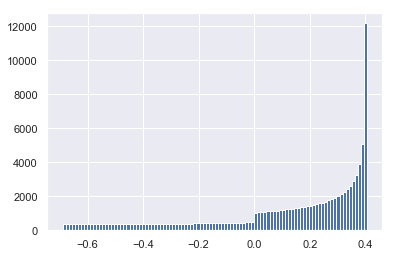

In [23]:
# More bins
b = 100

plt.hist(y, bins=b)
plt.show()